In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools

In [8]:
# Load the datasets
umi_pop12 = pd.read_csv('/home/isabel/Desktop/Thesis_publications_researchPapers/PYTHON_P1/FINAL_FOR_PAPER/DEG_tables_performance/umi_pop12 .csv')
umi_pop34 = pd.read_csv('/home/isabel/Desktop/Thesis_publications_researchPapers/PYTHON_P1/FINAL_FOR_PAPER/DEG_tables_performance/umi_pop34 .csv')
nonumi_pop12 = pd.read_csv('/home/isabel/Desktop/Thesis_publications_researchPapers/PYTHON_P1/FINAL_FOR_PAPER/DEG_tables_performance/nonumi_pop12 .csv')
nonumi_pop34 = pd.read_csv('/home/isabel/Desktop/Thesis_publications_researchPapers/PYTHON_P1/FINAL_FOR_PAPER/DEG_tables_performance/nonumi_pop34 .csv')

# Add a new column to each dataframe to identify the condition
umi_pop12['Condition'] = 'UMI Pop 12'
umi_pop34['Condition'] = 'UMI Pop 34'
nonumi_pop12['Condition'] = 'Non-UMI Pop 12'
nonumi_pop34['Condition'] = 'Non-UMI Pop 34'

# Combine the dataframes
combined_data = pd.concat([umi_pop12, umi_pop34, nonumi_pop12, nonumi_pop34], ignore_index=True)

# Cleaning up the column names
combined_data.columns = combined_data.columns.str.strip()

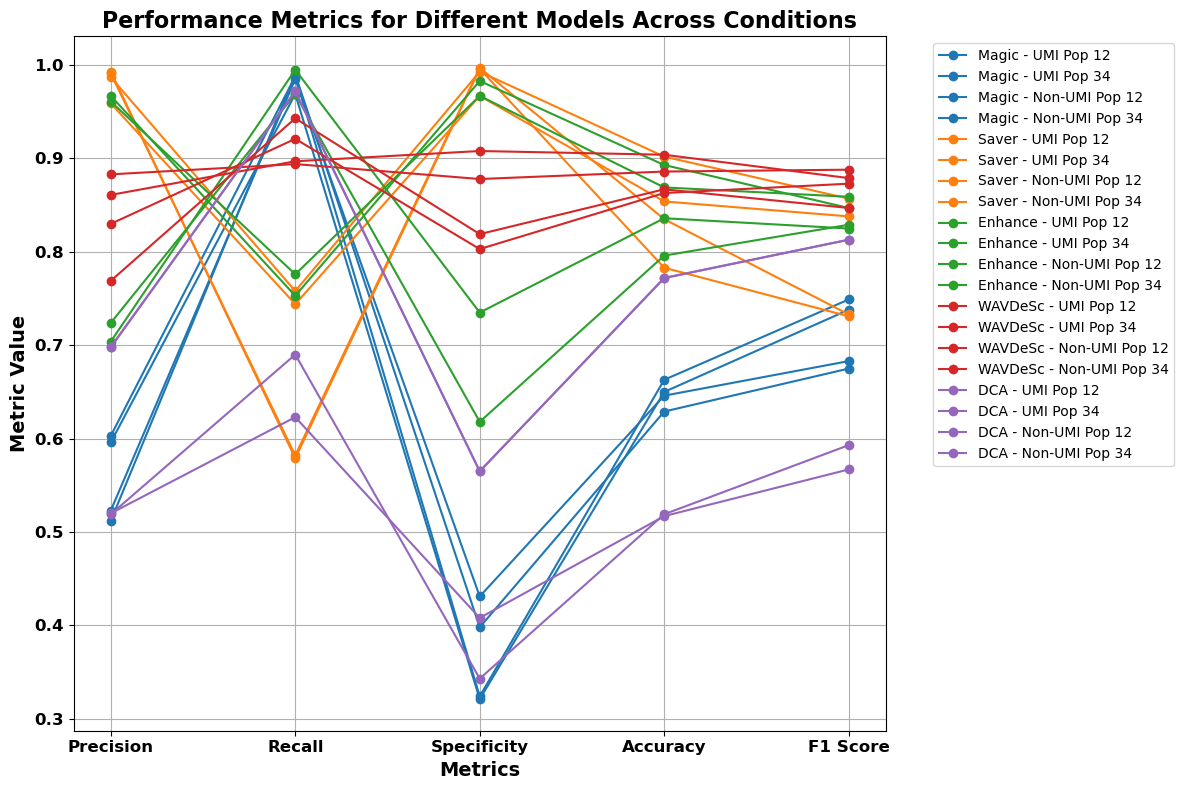

In [9]:
# Define the metrics
metrics = ['Precision', 'Recall', 'Specificity', 'Accuracy', 'F1 Score']

# Define a color palette
palette = itertools.cycle(plt.cm.tab10.colors)

# Create a color map for each model
/home/isabel/Desktop/Thesis_publications_researchPapers/PYTHON_P1/data for line graphcolor_map = {model: next(palette) for model in combined_data['Model'].unique()}

fig, ax = plt.subplots(figsize=(12, 8))

# Plot each model with its unified color
for model in combined_data['Model'].unique():
    model_color = color_map[model]
    subset = combined_data[combined_data['Model'] == model]
    for condition in subset['Condition'].unique():
        condition_subset = subset[subset['Condition'] == condition]
        ax.plot(metrics, condition_subset[metrics].values.flatten(), marker='o', color=model_color, label=f"{model} - {condition}")

# Enhancing the legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')

# Enhancing and boldening the axes
ax.set_title('Performance Metrics for Different Models Across Conditions', fontsize=16, fontweight='bold')
ax.set_xlabel('Metrics', fontsize=14, fontweight='bold')
ax.set_ylabel('Metric Value', fontsize=14, fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=12)

# Boldening and enlarging the y-axis values and x-axis labels
for tick in ax.get_xticklabels():
    tick.set_fontsize(12)
    tick.set_fontweight('bold')

for tick in ax.get_yticklabels():
    tick.set_fontsize(12)
    tick.set_fontweight('bold')

ax.grid(True)

plt.tight_layout()
plt.show()
